# Prompt Engineering Lifecycle

### Setup

In [ ]:
# You can set them inline
import os
os.environ["OPENAI_API_KEY"] = ""
os.environ["LANGSMITH_API_KEY"] = ""
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langsmith-academy"

In [1]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(dotenv_path=".env", override=True)

True

### Log a trace

In [2]:
from app import langsmith_rag

question = "How do I set up tracing to LangSmith with @traceable?"
langsmith_rag(question)

USER_AGENT environment variable not set, consider setting it to identify your requests.
Fetching pages: 100%|##########| 197/197 [00:34<00:00,  5.66it/s]


"To set up tracing to LangSmith with the @traceable decorator in Python, first ensure that the LANGSMITH_TRACING environment variable is set to 'true' and the LANGSMITH_API_KEY is configured with your API key. After that, simply decorate your functions with @traceable to log traces. Make sure you call synchronous functions using the await keyword to ensure traces are logged correctly."

opening up an earlier tracing project
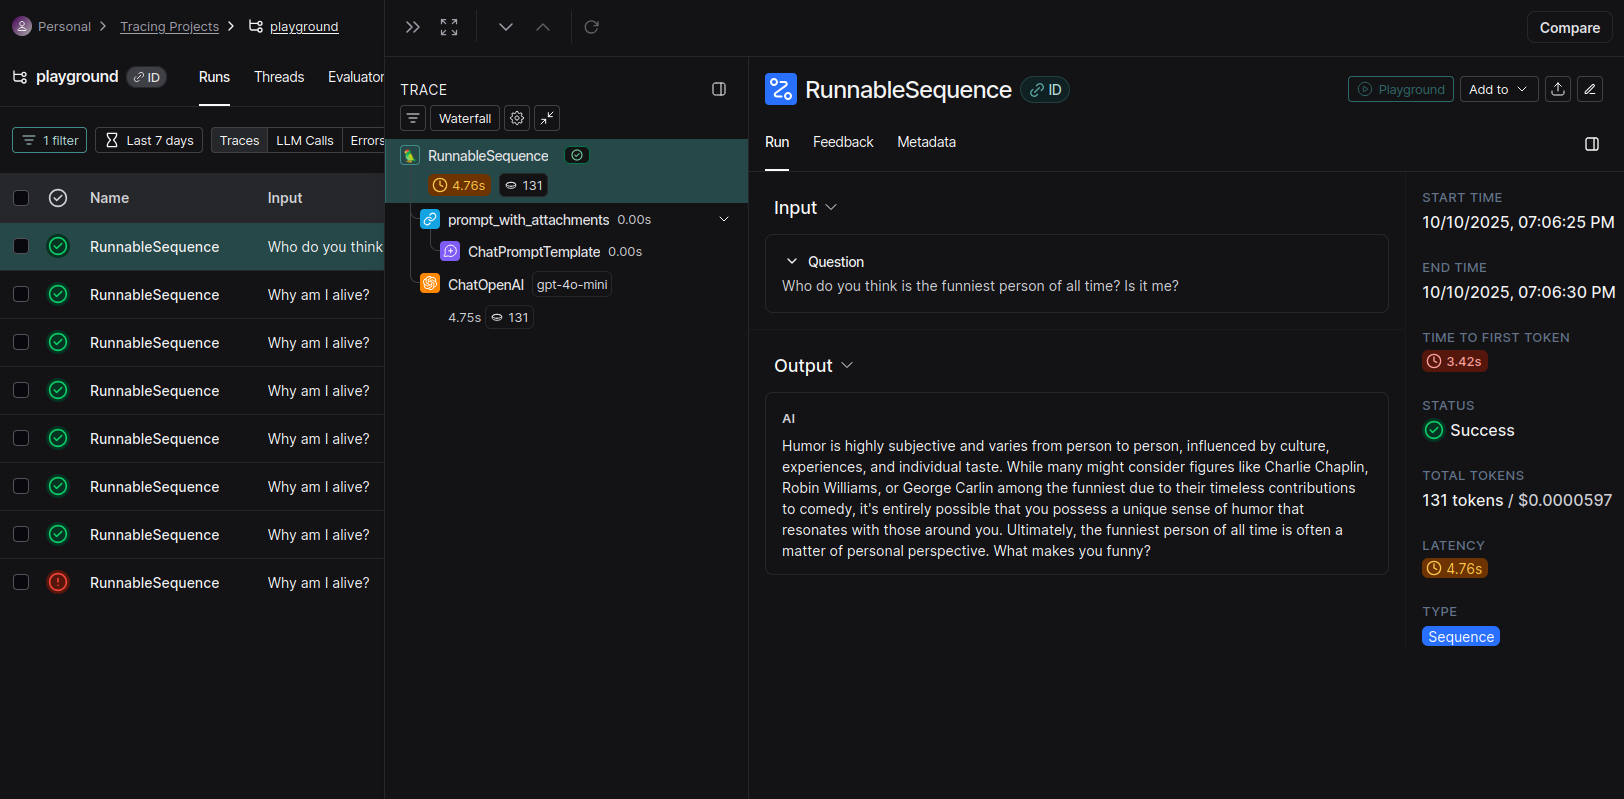

### Create a Dataset

Let's create a dataset to evaluate this particular step of our application

In [3]:
from langsmith import Client

example_dataset = [
    (
        "How do I set up tracing to LangSmith with @traceable?",
        """ 2. Log a trace​\nOnce you've set up your environment, you can call LangChain runnables as normal.\nLangSmith will infer the proper tracing config:\n\nHow to log and view traces to LangSmith | 🦜️🛠️ LangSmith\n\n2. Log a trace​\nOnce you've set up your environment, wrap or decorate the custom functions/SDKs you want to trace.\nLangSmith will then infer the proper tracing config:\n\nSkip to main contentGo to API DocsSearchRegionUSEUGo to AppQuick startObservabilityConceptual GuideHow-to GuidesTracingAnnotate code for tracingToggle tracing on and offUpload files with tracesLog traces to specific projectSet a sampling rate for tracesAdd metadata and tags to tracesImplement distributed tracingAccess the current run (span) within a traced functionLog multimodal tracesLog retriever tracesLog custom LLM tracesPrevent logging of sensitive data in tracesQuery tracesShare or unshare a trace publiclyCompare tracesTrace generator functionsTrace with LangChain (Python and JS/TS)Trace with LangGraph (Python and JS/TS)Trace with Instructor (Python only)Trace with the Vercel AI SDK (JS/TS only)Trace without setting environment variablesTrace using the LangSmith REST APICalculate token-based costs for tracesTroubleshoot trace nesting[Beta] Bulk Exporting Trace DataTrace JS functions in serverless environmentsMonitoring and automationsTutorialsAdd observability to your LLM applicationEvaluationPrompt EngineeringDeployment (LangGraph Cloud)AdministrationSelf-hostingReferenceObservabilityHow-to GuidesTracingAnnotate code for tracingOn this pageAnnotate code for tracing\nThere are several ways to log traces to LangSmith.\ntipIf you are using LangChain (either Python or JS/TS), you can skip this section and go directly to the LangChain-specific instructions.\nUse @traceable / traceable​\nLangSmith makes it easy to log traces with minimal changes to your existing code with the @traceable decorator in Python and traceable function in TypeScript.\nnoteThe LANGSMITH_TRACING environment variable must be set to 'true' in order for traces to be logged to LangSmith, even when using @traceable or traceable. This allows you to toggle tracing on and off without changing your code.Additionally, you will need to set the LANGSMITH_API_KEY environment variable to your API key (see Setup for more information).By default, the traces will be logged to a project named default.\nTo log traces to a different project, see this section. \n\n""",
        "To set up tracing to LangSmith using the `@traceable` decorator in Python, first ensure that you have the `LANGSMITH_TRACING` environment variable set to 'true' and the `LANGSMITH_API_KEY` set to your API key. Then, you can simply decorate your functions like this:\n\n```python\nfrom langsmith import traceable\n\n@traceable\ndef my_function():\n    # Your code here\n    pass\n```\n\nThis will log traces for `my_function` automatically once the necessary environment variables are configured."
    ),
    (
        "How can I use the tracing context manager?",
        """Use the trace context manager (Python only)​\nIn Python, you can use the trace context manager to log traces to LangSmith. This is useful in situations where:\n\nYou want to log traces for a specific block of code.\nYou want control over the inputs, outputs, and other attributes of the trace.\nIt is not feasible to use a decorator or wrapper.\nAny or all of the above.\n\nIn some environments, it is not possible to set environment variables. In these cases, you can set the tracing configuration programmatically.\nRecently changed behaviorDue to a number of asks for finer-grained control of tracing using the trace context manager,\nwe changed the behavior of with trace to honor the LANGSMITH_TRACING environment variable in version 0.1.95 of the Python SDK. You can find more details in the release notes.\nThe recommended way to disable/enable tracing without setting environment variables is to use the with tracing_context context manager, as shown in the example below.\nPythonTypeScriptThe recommended way to do this in Python is to use the tracing_context context manager. This works for both code annotated with traceable and code within the trace context manager.\n\nSkip to main contentGo to API DocsSearchRegionUSEUGo to AppQuick startObservabilityConceptual GuideHow-to GuidesTracingAnnotate code for tracingToggle tracing on and offUpload files with tracesLog traces to specific projectSet a sampling rate for tracesAdd metadata and tags to tracesImplement distributed tracingAccess the current run (span) within a traced functionLog multimodal tracesLog retriever tracesLog custom LLM tracesPrevent logging of sensitive data in tracesQuery tracesShare or unshare a trace publiclyCompare tracesTrace generator functionsTrace with LangChain (Python and JS/TS)Trace with LangGraph (Python and JS/TS)Trace with Instructor (Python only)Trace with the Vercel AI SDK (JS/TS only)Trace without setting environment variablesTrace using the LangSmith REST APICalculate token-based costs for tracesTroubleshoot trace nesting[Beta] Bulk Exporting Trace DataTrace JS functions in serverless environmentsMonitoring and automationsTutorialsAdd observability to your LLM applicationEvaluationPrompt EngineeringDeployment (LangGraph Cloud)AdministrationSelf-hostingReferenceObservabilityHow-to GuidesTracingTroubleshoot trace nestingOn this pageTroubleshoot trace nesting\nWhen tracing with the LangSmith SDK, LangGraph, and LangChain, tracing should automatically propagate the correct context so that code executed within a parent trace will be rendered in the expected location in the UI.\nIf you see a child run go to a separate trace (and appear on the top level), it may be caused by one of the following known \"edge cases\".\nPython​\nThe following outlines common causes for \"split\" traces when building with python.\nContext propagation using asyncio​\nWhen using async calls (especially with streaming) in Python versions < 3.11, you may encounter issues with trace nesting. This is because Python's asyncio only added full support for passing context in version 3.11.\nWhy​\nLangChain and LangSmith SDK use contextvars to propagate tracing information implicitly. In Python 3.11 and above, this works seamlessly. However, in earlier versions (3.8, 3.9, 3.10), asyncio tasks lack proper contextvar support, which can lead to disconnected traces.\nTo resolve​\n\nContext propagation using threading​\nIt's common to start tracing and want to apply some parallelism on child tasks all within a single trace. Python's stdlib ThreadPoolExecutor by default breaks tracing.\nWhy​\nPython's contextvars start empty within new threads. Here are two approaches to handle maintain trace contiguity:\nTo resolve​\n\n\nUsing LangSmith's ContextThreadPoolExecutor\nLangSmith provides a ContextThreadPoolExecutor that automatically handles context propagation:\nfrom langsmith.utils import ContextThreadPoolExecutorfrom langsmith import traceable@traceabledef outer_func():    with ContextThreadPoolExecutor() as executor:        inputs = [1, 2]        r = list(executor.map(inner_func, inputs))@traceabledef inner_func(x):    print(x)outer_func()\n\n\nManually providing the parent run tree\nAlternatively, you can manually pass the parent run tree to the inner function:\nfrom langsmith import traceable, get_current_run_treefrom concurrent.futures import ThreadPoolExecutor@traceabledef outer_func():    rt = get_current_run_tree()    with ThreadPoolExecutor() as executor:        r = list(            executor.map(                lambda x: inner_func(x, langsmith_extra={\"parent\": rt}), [1, 2]            )        )@traceabledef inner_func(x):    print(x)outer_func()\nIn this approach, we use get_current_run_tree() to obtain the current run tree and pass it to the inner function using the langsmith_extra parameter. \n\n """,
        "You can use the tracing context manager by wrapping the code you want to trace with the `with trace_context:` statement. Here's a simple example:\n\n```python\nfrom langsmith import trace_context\n\nwith trace_context:\n    # Your traceable code here\n    print(\"Tracing this block of code.\")\n``` \n\nThis will log traces to LangSmith for the specified code block."
    ),
    (
        "How can I use RunTree?",
        """PythonTypeScriptimport openaifrom langsmith.run_trees import RunTree# This can be a user input to your appquestion = \"Can you summarize this morning's meetings?\"# Create a top-level runpipeline = RunTree(  name=\"Chat Pipeline\",  run_type=\"chain\",  inputs={\"question\": question})# This can be retrieved in a retrieval stepcontext = \"During this morning's meeting, we solved all world conflict.\"messages = [  { \"role\": \"system\", \"content\": \"You are a helpful assistant. Please respond to the user's request only based on the given context.\" },  { \"role\": \"user\", \"content\": f\"Question: {question}\\nContext: {context}\"}]# Create a child runchild_llm_run = pipeline.create_child(  name=\"OpenAI Call\",  run_type=\"llm\",  inputs={\"messages\": messages},)# Generate a completionclient = openai.Client()chat_completion = client.chat.completions.create(  model=\"gpt-4o-mini\", messages=messages)# End the runs and log themchild_llm_run.end(outputs=chat_completion)child_llm_run.postRun()pipeline.end(outputs={\"answer\": chat_completion.choices[0].message.content})pipeline.postRun()import OpenAI from \"openai\";import { RunTree } from \"langsmith\";// This can be a user input to your appconst question = \"Can you summarize this morning's meetings?\";const pipeline = new RunTree({  name: \"Chat Pipeline\",  run_type: \"chain\",  inputs: { question }});await pipeline.postRun();// This can be retrieved in a retrieval stepconst context = \"During this morning's meeting, we solved all world conflict.\";const messages = [  { role: \"system\", content: \"You are a helpful assistant. Please respond to the user's request only based on the given context.\" },  { role: \"user\", content: `Question: ${question}Context: ${context}` }];// Create a child runconst childRun = await pipeline.createChild({  name: \"OpenAI Call\",\n\nPythonTypeScriptimport openaifrom langsmith.run_trees import RunTree# This can be a user input to your appquestion = \"Can you summarize this morning's meetings?\"# Create a top-level runpipeline = RunTree(  name=\"Chat Pipeline\",  run_type=\"chain\",  inputs={\"question\": question})await pipeline.postRun();# This can be retrieved in a retrieval stepcontext = \"During this morning's meeting, we solved all world conflict.\"messages = [  { \"role\": \"system\", \"content\": \"You are a helpful assistant. Please respond to the user's request only based on the given context.\" },  { \"role\": \"user\", \"content\": f\"Question: {question}\\nContext: {context}\"}]# Create a child runchild_llm_run = pipeline.create_child(  name=\"OpenAI Call\",  run_type=\"llm\",  inputs={\"messages\": messages},)# Generate a completionclient = openai.Client()chat_completion = client.chat.completions.create(  model=\"gpt-3.5-turbo\", messages=messages)# End the runs and log themchild_llm_run.end(outputs=chat_completion)child_llm_run.postRun()pipeline.end(outputs={\"answer\": chat_completion.choices[0].message.content})pipeline.postRun()import OpenAI from \"openai\";import { RunTree } from \"langsmith\";// This can be a user input to your appconst question = \"Can you summarize this morning's meetings?\";const pipeline = new RunTree({  name: \"Chat Pipeline\",  run_type: \"chain\",  inputs: { question }});// This can be retrieved in a retrieval stepconst context = \"During this morning's meeting, we solved all world conflict.\";const messages = [  { role: \"system\", content: \"You are a helpful assistant. Please respond to the user's request only based on the given context.\" },  { role: \"user\", content: `Question: ${question}Context: ${context}` }];// Create a child runconst childRun = await pipeline.createChild({  name: \"OpenAI\n\nAlternatively, you can convert LangChain's RunnableConfig to a equivalent RunTree object by using RunTree.fromRunnableConfig or pass the RunnableConfig as the first argument of traceable-wrapped function.\n\nRunTree({  run_type: \"llm\",  name: \"OpenAI Call RunTree\",  inputs: { messages },  tags: [\"my-tag\"],  extra: {metadata: {\"my-key\": \"my-value\"}}})await rt.postRun();const chatCompletion = await client.chat.completions.create({  model: \"gpt-3.5-turbo\",  messages: messages,});// End and submit the runawait rt.end(chatCompletion)await rt.patchRun()from langchain_openai import ChatOpenAIfrom langchain_core.prompts import ChatPromptTemplatefrom langchain_core.output_parsers import StrOutputParserprompt = ChatPromptTemplate.from_messages([(\"system\", \"You are a helpful AI.\"),(\"user\", \"{input}\")])chat_model = ChatOpenAI()output_parser = StrOutputParser()# Tags and metadata can be configured with RunnableConfigchain = (prompt | chat_model | output_parser).with_config({\"tags\": [\"top-level-tag\"], \"metadata\": {\"top-level-key\": \"top-level-value\"}})# Tags and metadata can also be passed at runtimechain.invoke({\"input\": \"What is the meaning of life?\"}, {\"tags\": [\"shared-tags\"], \"metadata\": {\"shared-key\": \"shared-value\"}})import { ChatOpenAI } from \"@langchain/openai\";import { ChatPromptTemplate } from \"@langchain/core/prompts\";import { StringOutputParser } from \"@langchain/core/output_parsers\";const prompt = ChatPromptTemplate.fromMessages([[\"system\", \"You are a helpful AI.\"],[\"user\", \"{input}\"]])const model = new ChatOpenAI({ modelName: \"gpt-3.5-turbo\" });const outputParser = new StringOutputParser();// Tags and metadata can be configured with RunnableConfigconst chain = (prompt.pipe(model).pipe(outputParser)).withConfig({\"tags\": [\"top-level-tag\"], \"metadata\": {\"top-level-key\": \"top-level-value\"}});// Tags and metadata can also be \n\n""",
        "You can use `RunTree` by creating a pipeline where you define its name, type, and inputs. For example:\n\n```python\nfrom langsmith.run_trees import RunTree\n\npipeline = RunTree(name=\"My Pipeline\", run_type=\"chain\", inputs={\"question\": \"Your question here\"})\n```\n\nYou can then create child runs and manage them accordingly within the pipeline."
    ),
]

client = Client()
dataset_name = "Technical Questions"

# Create dataset
dataset = client.create_dataset(
    dataset_name=dataset_name, description="Technical questions about LangSmith"
)

# Prepare inputs and outputs
inputs = [{"question": q, "context": c} for q, c, _ in example_dataset]
outputs = [{"output": o} for _, _, o in example_dataset]

# Create examples in the dataset
client.create_examples(
    inputs=inputs,
    outputs=outputs,
    dataset_id=dataset.id,
)


{'example_ids': ['62bb5e8f-fb90-48fa-a211-6bbda034a803',
  'b4792187-3889-48d9-a850-9977d8631025',
  '09cf0781-e5d5-4f91-976d-8c387b1b340a'],
 'count': 3}

### Update our Application to use Prompt Hub

We're going to pretty much define the same RAG application as before - with one crucial improvement.

Instead of pulling our `RAG_PROMPT` from utils.py, we're going to connect to the Prompt Hub in LangSmith.

Let's add the code snippet that will pull down our prompt that we just iterated on!

In [ ]:


from langchain import hub
from langsmith import Client

client = Client()

try:
    prompt = hub.pull("rag-assistant") 
except:
    from langchain.prompts.chat import ChatPromptTemplate
    
    rag_prompt_template = ChatPromptTemplate.from_messages([
        ("system", """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation. 
If you don't know the answer, just say that you don't know. 
Use three sentences maximum and keep the answer concise.

Context: {context}"""),
        ("human", "{question}")
    ])
    
    # Push it to the hub
    client.push_prompt("rag-assistant", object=rag_prompt_template)
    prompt = hub.pull("rag-assistant")

print("✅ Successfully pulled RAG prompt from Prompt Hub!")

✅ Successfully pulled RAG prompt from Prompt Hub!


In [ ]:
import os
import tempfile
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders.sitemap import SitemapLoader
from langchain_community.vectorstores import SKLearnVectorStore
from langchain_openai import OpenAIEmbeddings
from langsmith import traceable
from langsmith.client import convert_prompt_to_openai_format
from openai import OpenAI
from typing import List
import nest_asyncio

MODEL_NAME = "gpt-4o-mini"
MODEL_PROVIDER = "openai"
APP_VERSION = 1.0

# TODO: Remove this hard-coded prompt and replace it with Prompt Hub
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation. 
If you don't know the answer, just say that you don't know. 
Use three sentences maximum and keep the answer concise.
"""

openai_client = OpenAI()

def get_vector_db_retriever():
    persist_path = os.path.join(tempfile.gettempdir(), "union.parquet")
    embd = OpenAIEmbeddings()

    # If vector store exists, then load it
    if os.path.exists(persist_path):
        vectorstore = SKLearnVectorStore(
            embedding=embd,
            persist_path=persist_path,
            serializer="parquet"
        )
        return vectorstore.as_retriever(lambda_mult=0)

    # Otherwise, index LangSmith documents and create new vector store
    ls_docs_sitemap_loader = SitemapLoader(web_path="https://docs.smith.langchain.com/sitemap.xml", continue_on_failure=True)
    ls_docs = ls_docs_sitemap_loader.load()

    text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
        chunk_size=500, chunk_overlap=0
    )
    doc_splits = text_splitter.split_documents(ls_docs)

    vectorstore = SKLearnVectorStore.from_documents(
        documents=doc_splits,
        embedding=embd,
        persist_path=persist_path,
        serializer="parquet"
    )
    vectorstore.persist()
    return vectorstore.as_retriever(lambda_mult=0)

nest_asyncio.apply()
retriever = get_vector_db_retriever()

"""
retrieve_documents
- Returns documents fetched from a vectorstore based on the user's question
"""
@traceable(run_type="chain")
def retrieve_documents(question: str):
    return retriever.invoke(question)

"""
generate_response
- Calls `call_openai` to generate a model response after formatting inputs
"""
@traceable(run_type="chain")
def generate_response(question: str, documents):
    formatted_docs = "\n\n".join(doc.page_content for doc in documents)
    
    # Use our prompt pulled from Prompt Hub instead of manually formatting!
    formatted_prompt = prompt.invoke({"context": formatted_docs, "question": question})
    messages = convert_prompt_to_openai_format(formatted_prompt)["messages"]
    
    return call_openai(messages)

"""
call_openai
- Returns the chat completion output from OpenAI
"""
@traceable(
    run_type="llm",
    metadata={
        "ls_provider": MODEL_PROVIDER,
        "ls_model_name": MODEL_NAME
    }
)
def call_openai(messages: List[dict]) -> str:
    return openai_client.chat.completions.create(
        model=MODEL_NAME,
        messages=messages,
    )

"""
langsmith_rag
- Calls `retrieve_documents` to fetch documents
- Calls `generate_response` to generate a response based on the fetched documents
- Returns the model response
"""
@traceable(run_type="chain")
def langsmith_rag(question: str):
    documents = retrieve_documents(question)
    response = generate_response(question, documents)
    return response.choices[0].message.content


In [6]:
question = "How do I set up tracing to LangSmith with @traceable?"
langsmith_rag(question)

"To set up tracing to LangSmith with @traceable, first ensure that the LANGSMITH_TRACING environment variable is set to 'true'. Next, decorate any function you want to trace with the @traceable decorator. Lastly, make sure to set the LANGSMITH_API_KEY environment variable to your API key for authentication."